In [46]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import matplotlib as mpl
import datetime
import seaborn as sns

In [2]:
df = pd.read_pickle('./data_final.pkl') #importing cleaned data from the other file

In [7]:
df_day = df.groupby(by = ['Station','Date']).sum()

In [10]:
df_day = df_day.reset_index()

In [11]:
df_day['Day_of_week'] = df_day.Date.apply(lambda x: x.weekday())

In [12]:
df_day['is_weekday'] = df_day.Day_of_week.apply(lambda x: np.where(x < 5, True, False))

In [67]:
weekdays = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
df_day.head()

,Station,Date,Exit_diff,Entry_diff,Net_Flow,Day_of_week,is_weekday
0,1 AV,2018-12-29,15430.0,12071.0,27501.0,5,False
1,1 AV,2018-12-30,14775.0,11989.0,26764.0,6,False
2,1 AV,2018-12-31,18246.0,14786.0,33032.0,0,True
3,1 AV,2019-01-01,12097.0,9989.0,22086.0,1,True
4,1 AV,2019-01-02,21058.0,18476.0,39534.0,2,True


In [16]:
week_day_data = pd.DataFrame(df_day[df_day.is_weekday == True])

In [17]:
week_end_data = pd.DataFrame(df_day[df_day.is_weekday == False])

In [19]:
week_day_data_summary = week_day_data.groupby( by = ['Station']).sum()

In [37]:
NFby_station_weekday = week_day_data_summary.Net_Flow.sort_values(ascending = False).rename('weekday')

In [72]:
top_ten = NFby_station_weekday.index[:10].tolist()

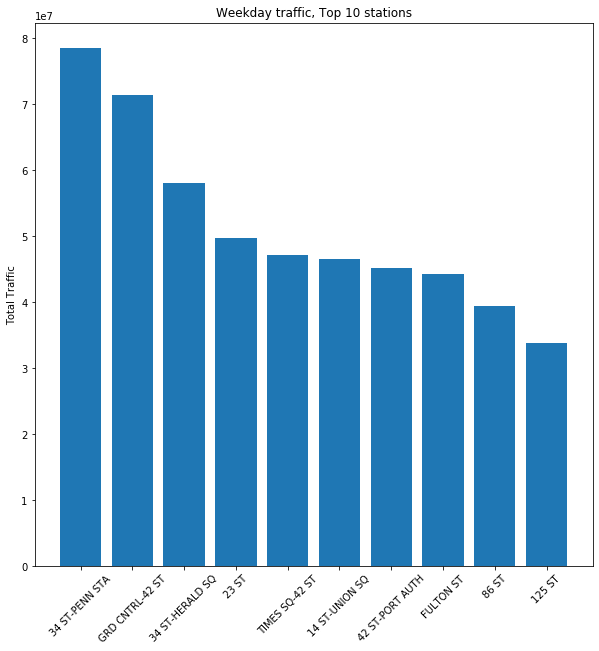

In [28]:
plot_length = 10

plt.figure(figsize=[10,10])
plt.bar(x = NFby_station_weekday.index[:plot_length],height = NFby_station_weekday[:plot_length])
plt.xticks(np.arange(plot_length),NFby_station_weekday.index[:plot_length],rotation=45)

plt.ylabel('Total Traffic')
plt.title('Weekday traffic, Top {} stations'.format(plot_length))

plt.savefig('graph_top_stations_weekday.png')

In [29]:
week_end_data_summary = week_end_data.groupby( by = ['Station']).sum()

In [38]:
NFby_station_weekend = week_end_data_summary.Net_Flow.sort_values(ascending = False).rename('weekend')

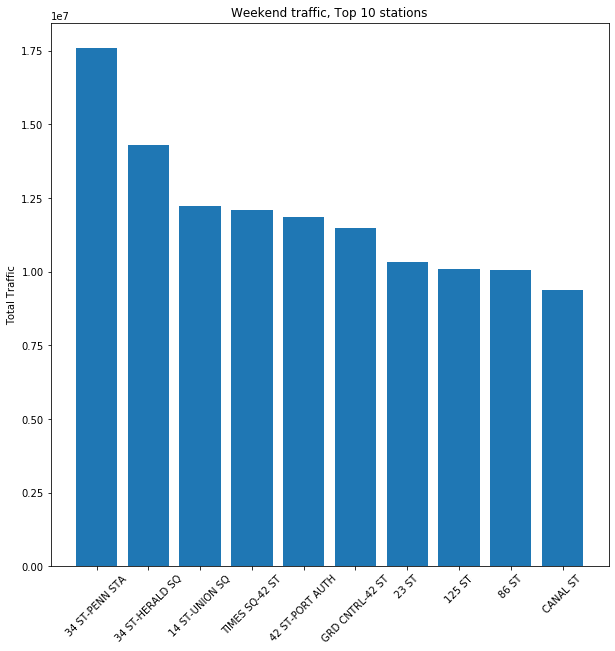

In [31]:
plot_length = 10

plt.figure(figsize=[10,10])
plt.bar(x = NFby_station_weekend.index[:plot_length],height = NFby_station_weekend[:plot_length])
plt.xticks(np.arange(plot_length),NFby_station_weekend.index[:plot_length],rotation=45)

plt.ylabel('Total Traffic')
plt.title('Weekend traffic, Top {} stations'.format(plot_length))

plt.savefig('graph_top_stations_weekend.png')

In [39]:
week_info = pd.DataFrame([NFby_station_weekday,NFby_station_weekend]).transpose()

In [49]:
week_info['weekday_weekend_ratio'] = week_info.weekday*2/(5*week_info.weekend)

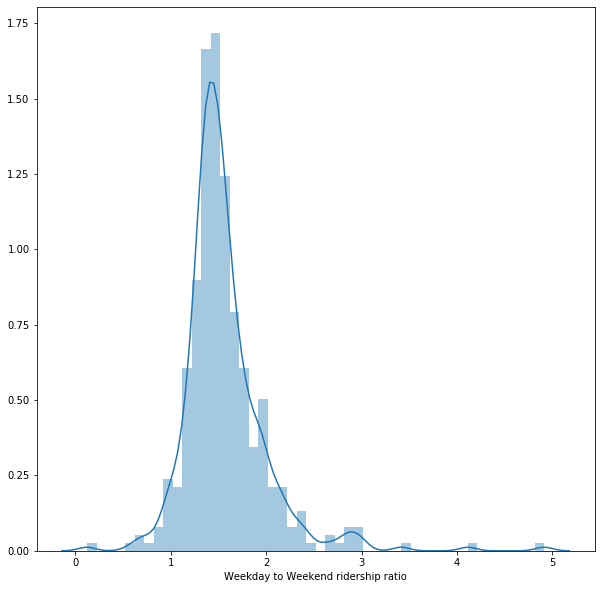

In [62]:
plt.figure(figsize=[10,10])
sns.distplot(week_info.weekday_weekend_ratio, label = 'Weekday to Weekend ridership ratio')
plt.xlabel('Weekday to Weekend ridership ratio')
plt.savefig('weekday to weekend ridership.png')

In [56]:
week_info['tourist_flag'] = np.where(abs(week_info.weekday_weekend_ratio-1) < 0.05 , True, False )

In [59]:
week_info[week_info.tourist_flag == True] # the stations selected are tourists stations.

,weekday,weekend,weekday_weekend_ratio,tourist_flag
CONEY IS-STILLW,6074873.0,2470846.0,0.983448,True
METROPOLITAN AV,5217522.0,2109850.0,0.989174,True
JFK JAMAICA CT1,4790072.0,1847814.0,1.036916,True
BROADWAY JCT,3928093.0,1530937.0,1.026324,True
HOWARD BCH JFK,2128900.0,839967.0,1.013802,True
BOWERY,1767008.0,739975.0,0.955172,True
LAFAYETTE AV,1653855.0,650372.0,1.017175,True
SENECA AVE,1549479.0,605172.0,1.024158,True
HEWES ST,1425132.0,586549.0,0.971876,True
ROCKAWAY PARK B,368357.0,151224.0,0.974335,True


We will focus the exploration now on the top 10 stations only.
First, we would like to know how busy it is during weekdays v.s. weekends

In [65]:
week_day_data_dayofweek = week_day_data.groupby( by = ['Station','Day_of_week']).mean().reset_index()

In [69]:
week_day_data_dayofweek.Day_of_week.replace(weekdays,inplace = True)

In [79]:
week_day_data_dayofweek[week_day_data_dayofweek.Station.isin(top_ten)].groupby(by=['Station','Day_of_week']).mean()

Exit_diff     Entry_diff       Net_Flow  \
Station         Day_of_week                                                
125 ST          Friday        62742.693878   77991.857143  140734.551020   
                Monday        57341.816327   71925.755102  129267.571429   
                Thursday      61653.367347   78227.224490  139880.591837   
                Tuesday       61253.326531   77181.489796  138434.816327   
                Wednesday     62972.693878   78934.551020  141907.244898   
14 ST-UNION SQ  Friday        94512.020408  101851.326531  196363.346939   
                Monday        85972.571429   88228.000000  174200.571429   
                Thursday      92324.367347   99875.204082  192199.571429   
                Tuesday       92691.265306   98292.489796  190983.755102   
                Wednesday     94352.163265  102662.163265  197014.326531   
23 ST           Friday        83462.510204  114975.836735  198438.346939   
                Monday        79067.673469  103925.489796  182993.163265   
                Thursday      89307.877551  122079.591837  211387.469388   
                Tuesday       87807.938776  119611.142857  207419.081633   
                Wednesday     89806.897959  123644.551020  213451.448980   
34 ST-HERALD SQ Friday       118598.673469  126549.346939  245148.020408   
                Monday       105590.142857  114608.979592  220199.122449   
                Thursday     115547.020408  125662.571429  241209.591837   
                Tuesday      112371.102041  123099.591837  235470.693878   
                Wednesday    116585.653061  126584.387755  243170.040816   
34 ST-PENN STA  Friday       156445.020408  163109.734694  319554.755102   
                Monday       140303.510204  159227.408163  299530.918367   
                Thursday     157542.346939  171645.387755  329187.734694   
                Tuesday      153231.448980  169887.734694  323119.183673   
                Wednesday    157267.816327  171356.163265  328623.979592   
42 ST-PORT AUTH Friday        84518.551020  102843.877551  187362.428571   
                Monday        74568.734694   97941.020408  172509.755102   
                Thursday      83374.714286  104931.693878  188306.408163   
                Tuesday       81680.489796  102985.244898  184665.734694   
                Wednesday     84079.877551  104670.387755  188750.265306   
86 ST           Friday        78038.816327   84659.530612  162698.346939   
                Monday        71004.632653   77289.897959  148294.530612   
                Thursday      77749.551020   86059.000000  163808.551020   
                Tuesday       77687.285714   85446.244898  163133.530612   
                Wednesday     78448.346939   87045.224490  165493.571429   
FULTON ST       Friday        82428.408163   96323.775510  178752.183673   
                Monday        77997.612245   88249.346939  166246.959184   
                Thursday      87030.673469   99465.693878  186496.367347   
                Tuesday       86054.857143   98318.204082  184373.061224   
                Wednesday     87333.938776  100391.102041  187725.040816   
GRD CNTRL-42 ST Friday       137197.775510  145667.183673  282864.959184   
                Monday       129309.265306  139528.040816  268837.306122   
                Thursday     144682.122449  156907.367347  301589.489796   
                Tuesday      142483.367347  155957.326531  298440.693878   
                Wednesday    145061.714286  158081.755102  303143.469388   
TIMES SQ-42 ST  Friday        95203.612245  101024.795918  196228.408163   
                Monday        84453.326531   88622.142857  173075.469388   
                Thursday      95275.081633  103310.530612  198585.612245   
                Tuesday       93611.530612   98835.510204  192447.040816   
                Wednesday     96260.122449  104863.653061  201123.775510   

                             is_weekday  
Station         Day_of_week           

['34 ST-PENN STA',
 'GRD CNTRL-42 ST',
 '34 ST-HERALD SQ',
 '23 ST',
 'TIMES SQ-42 ST',
 '14 ST-UNION SQ',
 '42 ST-PORT AUTH',
 'FULTON ST',
 '86 ST',
 '125 ST']